https://kaggle-kr.tistory.com/17?category=868316

In [1]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [39]:
# seaborn setting # 미리 세팅하면 편함
plt.style.use('seaborn')
sns.set(font_scale=1.5)

# Process

1. 데이터셋 확인 _ 대부분 캐글 데이터는 잘 정제되어 있지만 가끔 null값이 존재함. 확인 후 수정
2. 탐색적 데이터 분석 (Exploratory Data Analysis) _ 여러 feature들을 개별적 분석하고, feature들 간의 상관관계 확인. 시각화 툴을 사용하여 insight 얻기
3. Feature engineering _ 모델을 세우기 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering함.
 one-hot encoding, class로 나누기, 구간 나누기, 텍스트 데이터 처리 등
4. Model 만들기 _ sklearn을 사용해 모델 만들기.
5. 모델 학습 및 예측 _ trainset을 가지고 모델 학습시킨 후, testset을 가지고 prediction
6. 모델 평가 _ 예측 성능이 원하는 수준인지 판단
풀려는 문제에 딷라 모델을 평가하는 방식도 달라짐.

In [3]:
df_train = pd.read_csv('../data/titanic_train.csv')
df_test = pd.read_csv('../data/titanic_test.csv')

In [4]:
# 예측하려는 target label은 Survived
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# feature가 가진 통계치들을 반환해줌
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# PassengerId와 count 값이 다른 컬럼들은 null값이 있는 것으로 보임

## 1.1 Null data check

In [7]:
# dataframe의 대략적인 정보를 볼 수 있음 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# df_train 데이터에서 각 feature에 null값을 percent로 보여주기
for col in df_train.columns:
    null_percent = 100 * (df_train[col].isnull().sum() / df_train[col].shape[0])
    msg = "column: {:<10}\t Percent of NAN value: {:.2f}%".format(col, null_percent)
    print(msg)

column: PassengerId	 Percent of NAN value: 0.00%
column: Survived  	 Percent of NAN value: 0.00%
column: Pclass    	 Percent of NAN value: 0.00%
column: Name      	 Percent of NAN value: 0.00%
column: Sex       	 Percent of NAN value: 0.00%
column: Age       	 Percent of NAN value: 19.87%
column: SibSp     	 Percent of NAN value: 0.00%
column: Parch     	 Percent of NAN value: 0.00%
column: Ticket    	 Percent of NAN value: 0.00%
column: Fare      	 Percent of NAN value: 0.00%
column: Cabin     	 Percent of NAN value: 77.10%
column: Embarked  	 Percent of NAN value: 0.22%


In [11]:
# df_test에서 각 feature에 null값을 percent로 보여주기
for col in df_test.columns:
    null_percent = 100 * (df_test[col].isnull().sum() / df_test[col].shape[0])
    msg = "column: {:<10}\t Percent of NAN value: {:.2f}%".format(col, null_percent)
    print(msg)

column: PassengerId	 Percent of NAN value: 0.00%
column: Pclass    	 Percent of NAN value: 0.00%
column: Name      	 Percent of NAN value: 0.00%
column: Sex       	 Percent of NAN value: 0.00%
column: Age       	 Percent of NAN value: 20.57%
column: SibSp     	 Percent of NAN value: 0.00%
column: Parch     	 Percent of NAN value: 0.00%
column: Ticket    	 Percent of NAN value: 0.00%
column: Fare      	 Percent of NAN value: 0.24%
column: Cabin     	 Percent of NAN value: 78.23%
column: Embarked  	 Percent of NAN value: 0.00%


train, test set에서 Age, Cabin, Embarked, Fare에만 null 값이 존재함을 볼 수 있다.

<AxesSubplot:>

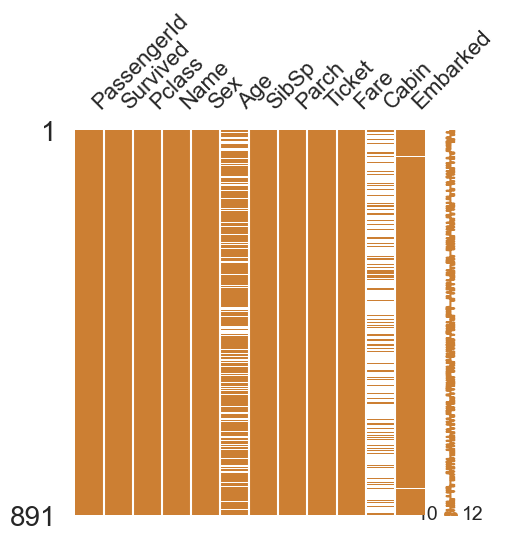

In [40]:
# MANO 라이브러리를 사용하면 null data 존재 여부를 더 쉽게 볼 수 있다
msno.matrix(df=df_train, figsize=(5, 5), color=(0.8, 0.5, 0.2)) 

<AxesSubplot:>

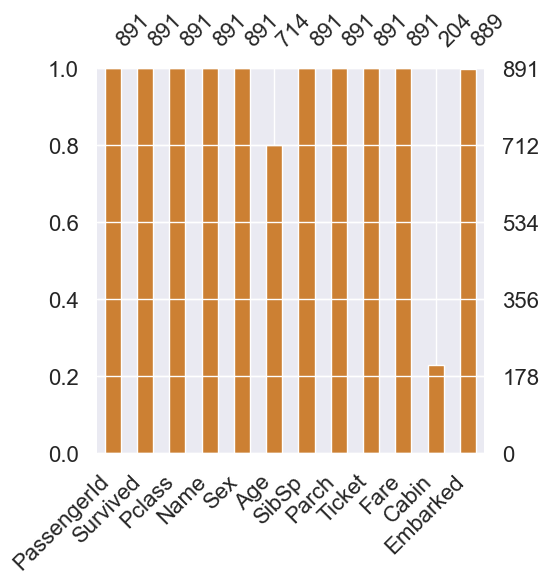

In [41]:
msno.bar(df=df_train, figsize=(5, 5), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

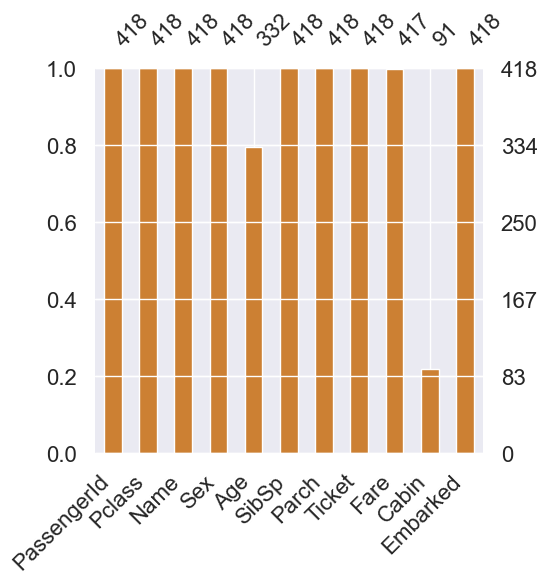

In [42]:
msno.bar(df=df_test, figsize=(5, 5), color=(0.8, 0.5, 0.2))

## Target label 확인

* target label이 어떤 distribution을 가지고 있는지 확인해봐야 함.
* 지금 같은 binary classification 문제의 경우에서 1과 0의 분포가 어떻냐에 따라 모델의 평가 방법이 달라질 수 있음

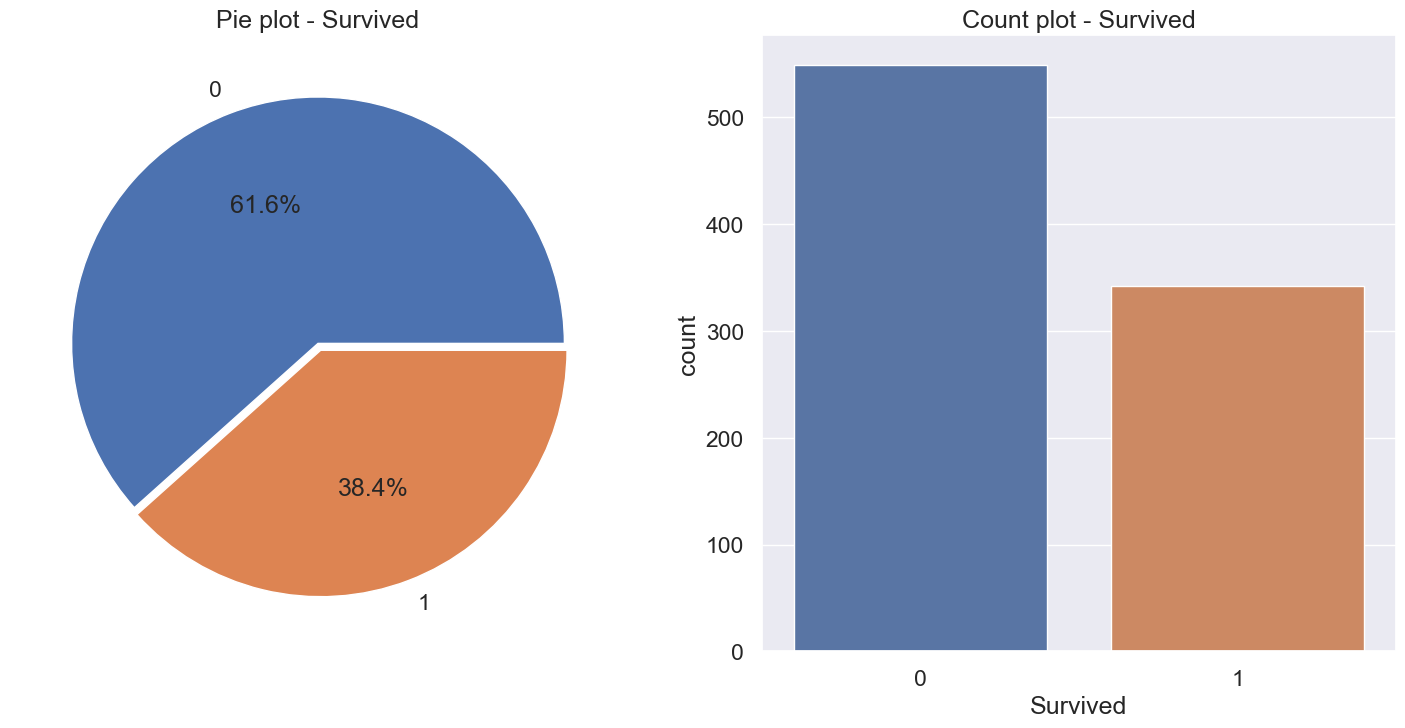

In [44]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(ax=ax[0], explode=[0, .03], autopct='%1.1f%%')
ax[0].set
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x=df_train['Survived'], ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [ ]:
# 사망자와 생존자의 분포가 균일한 편

## Exploratory Data Analysis
* 많은 데이터에 숨겨진 사실을 찾기 위해 적절한 시각화가 필요함
* 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있음. 특정 목적에 맞는 소스 코드를 정리해두면 좋음

#### 1. Pclass
* pclass는 ordinal, 서수형 데이터이다. 카테고리이면서 순서가 있는 데이터 타입
* 먼저 Pclass에 따른 생존률의 차이를 살펴볼 것

In [51]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [52]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [53]:
# pandas의 crosstab을 사용하면 위의 과정을 더 수월하게 볼 수 있음
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [56]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [57]:
# group 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있음
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


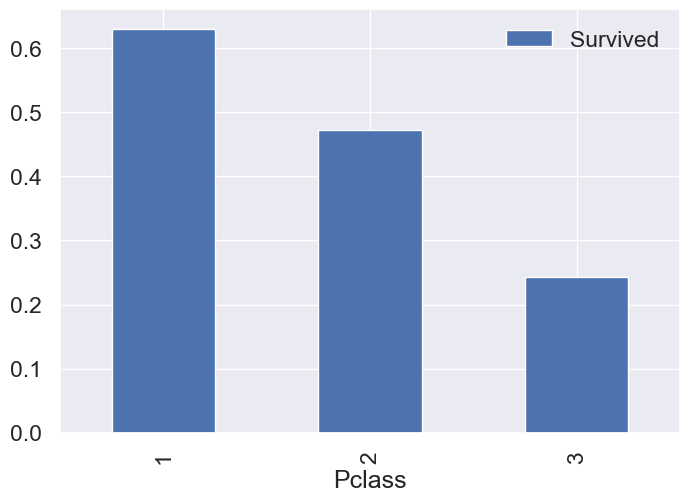

In [61]:
# mean()으로 생존률을 구한 다음, Survived 기준으로 정렬한 df를 bar 차트로 시각화
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
plt.show()

# Pclass가 좋을 수록 생존률이 높은 것을 확인할 수 있음

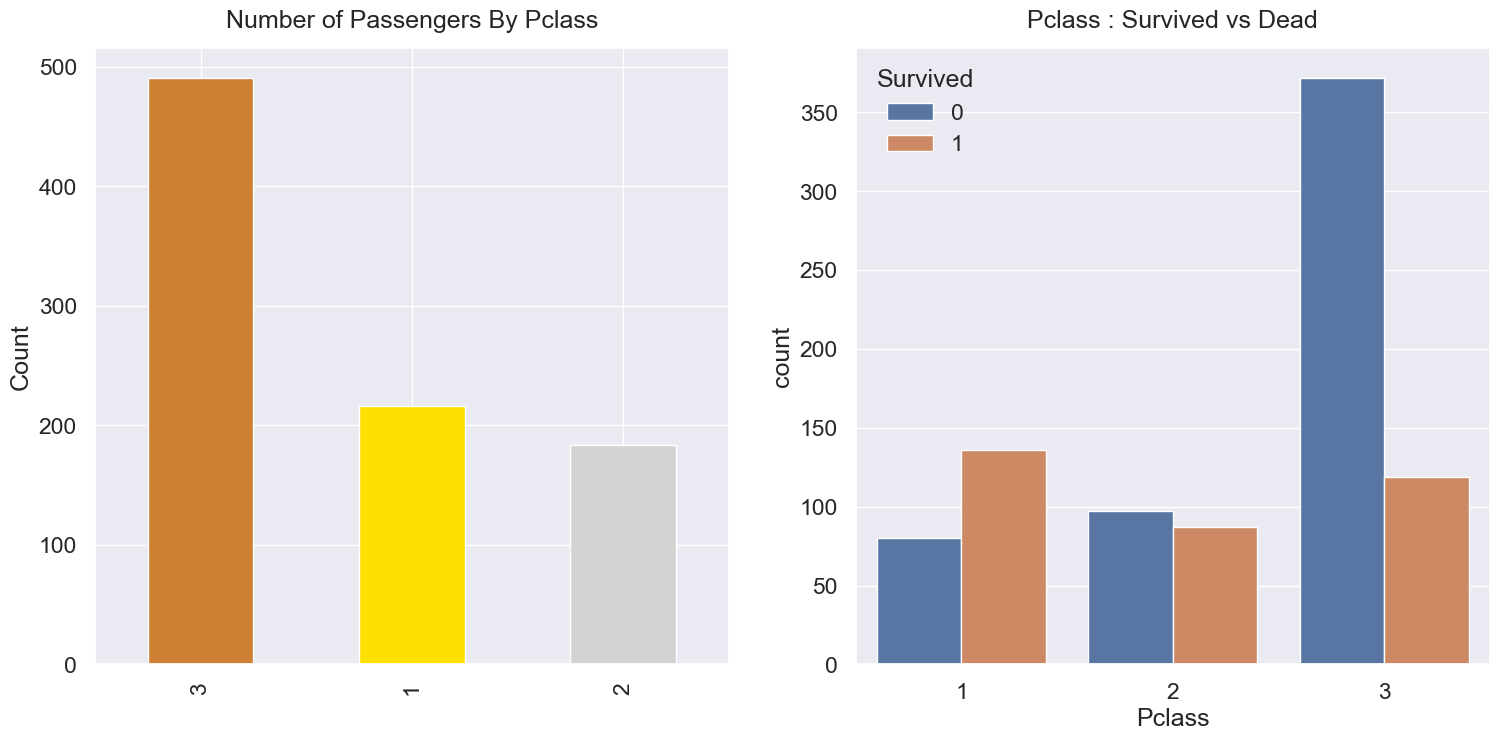

In [77]:
# seaborn의 countplot을 이용하여 특정 label에 따른 개수 확인
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

# 클래스가 높을 수록, 생존 확률이 높은 것을 확인할 수 있음
# Pclass 1, 2, 3 순서대로 63%, 48%, 25% 이다

# Pclass가 생존에 큰 영향을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라고 판단할 수 있다.

#### 2. Sex
* 성별에 따라 생존률이 어떻게 달라지는지 확인

In [80]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


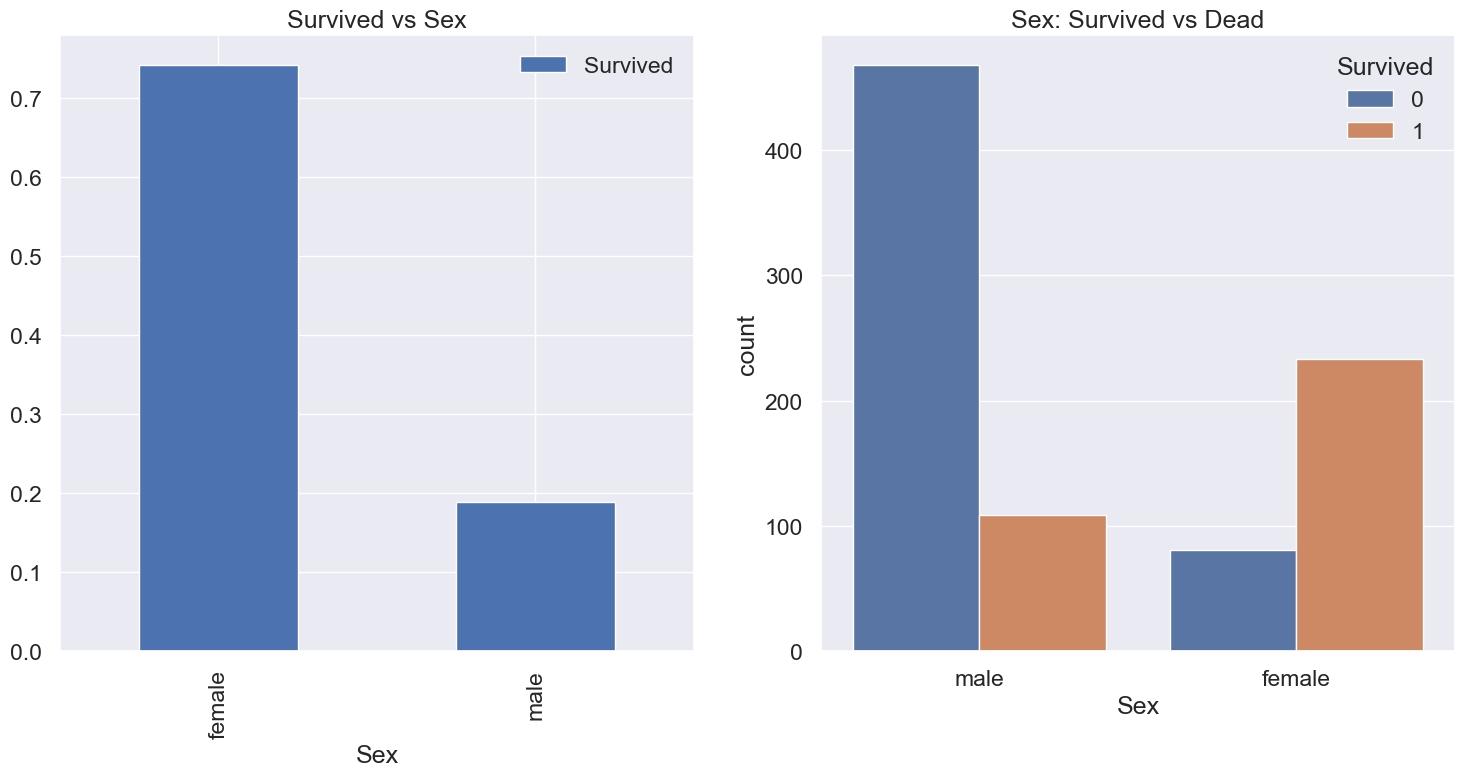

In [81]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(data=df_train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

# 여자의 생존확률이 더 높은 것을 확인할 수 있다. (실제로 아이와 노인도 여자로 분류했다는 말이 있음.)

In [82]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [85]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# Pclass와 마찬가지로 성별도 예측 모델에 쓰일 중요한 feature임을 알 수 있다.

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### 3. Both Sex and Pclass
* 이번에는 Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인해 보겠다.
* seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

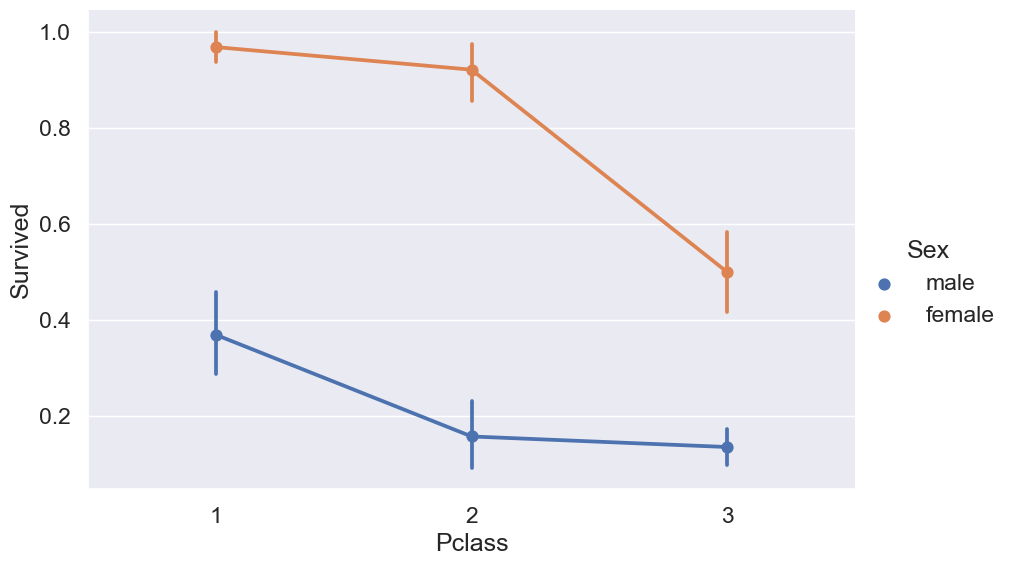

In [93]:
# factorplot은 seaborn에서 사라져서 catplot으로 대체
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=6, aspect=1.5)
plt.show()

# 모든 클래스에서 female이 살 확률이 male보다 높은 걸 알 수 있다.
# 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다

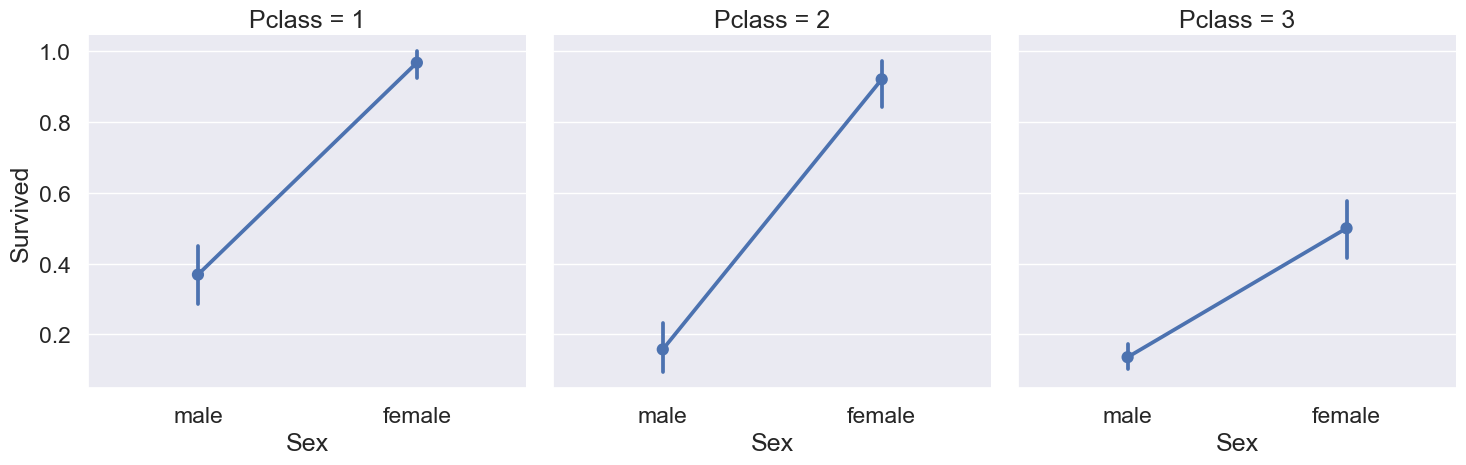

In [98]:
# hue 대신 column에 Pclass를 넣으면
# Pclass별 성별의 생존 확률을 비교할 수 있다.
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, aspect=1, kind='point')
plt.show()

#### 4.Age

In [100]:
oldest_passenger_age = df_train['Age'].max()
youngest_passenger_age = df_train['Age'].min()
avg_passenger_age = df_train['Age'].mean()
print('제일 나이 많은 탑습객 : {:.2f} years'.format(oldest_passenger_age))
print('제일 나이 어린 탑습객 : {:.2f} years'.format(youngest_passenger_age))
print('탑승객 평균 나이 : {:.2f} years'.format(avg_passenger_age))

제일 나이 많은 탑습객 : 80.00 years
제일 나이 어린 탑습객 : 0.42 years
탑승객 평균 나이 : 29.70 years


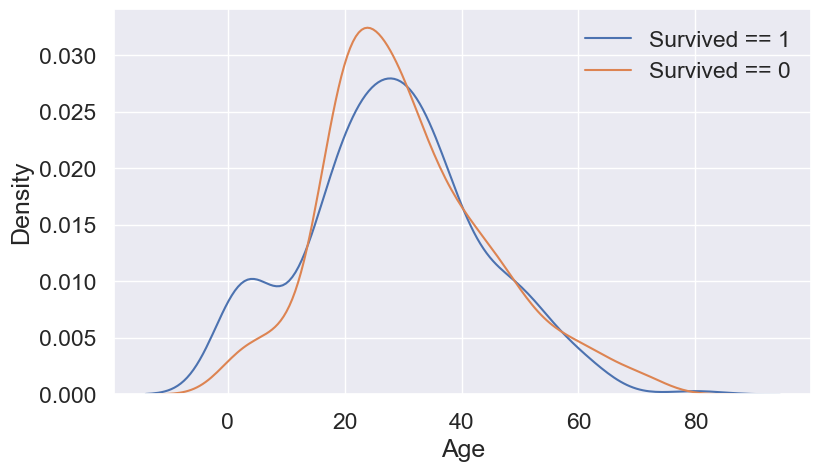

In [102]:
# 생존에 따른 Age의 histgram
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[ df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[ df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

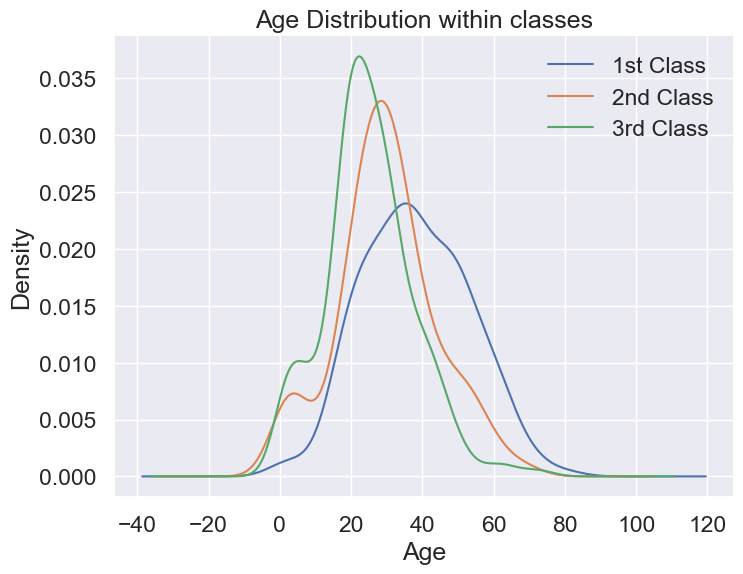

In [103]:
# Age distribution within classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

# class가 높을 수록 나이 많은 사람의 비중이 커짐

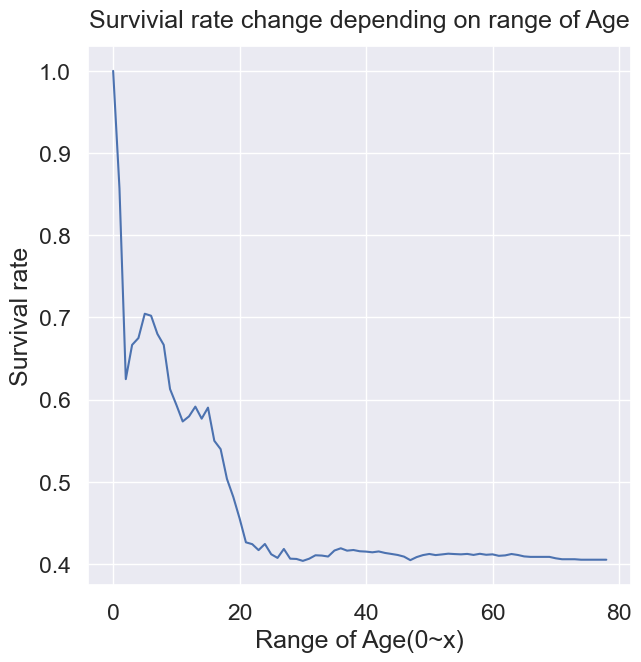

In [104]:
# 나이대가 변하면서 생존률이 어떻게 되는지 확인 필요
# 나이 범위를 점점 넓혀가며 생존률 확인

cummulate_survival_ratio = []
for i in range(1, 80):
    survived_data = df_train[df_train['Age'] < i]['Survived']
    cummulate_survival_ratio.append( survived_data.sum() / len(survived_data))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survivial rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

# 나이가 어릴 수록 생존률이 확실히 높은 것을 확인할 수 있었다.
# 나이가 중요한 feature로 쓰일 수 있음을 확인했다.

#### 5.Pclass, Sex, Age

* 지금까지 본 'Sex, Pclass, Age, Survived' 모두에 대해 확인해 보려고 한다.
* 이를 쉽게 그려주는 것이 seaborn의 violinplot이다
* x축은 우리가 나눠서 보고싶어 하는 case (여기서는 Pclass, Sex)를 나타내고,
  y축은 보고싶어 하는 distribution(Age) 이다.

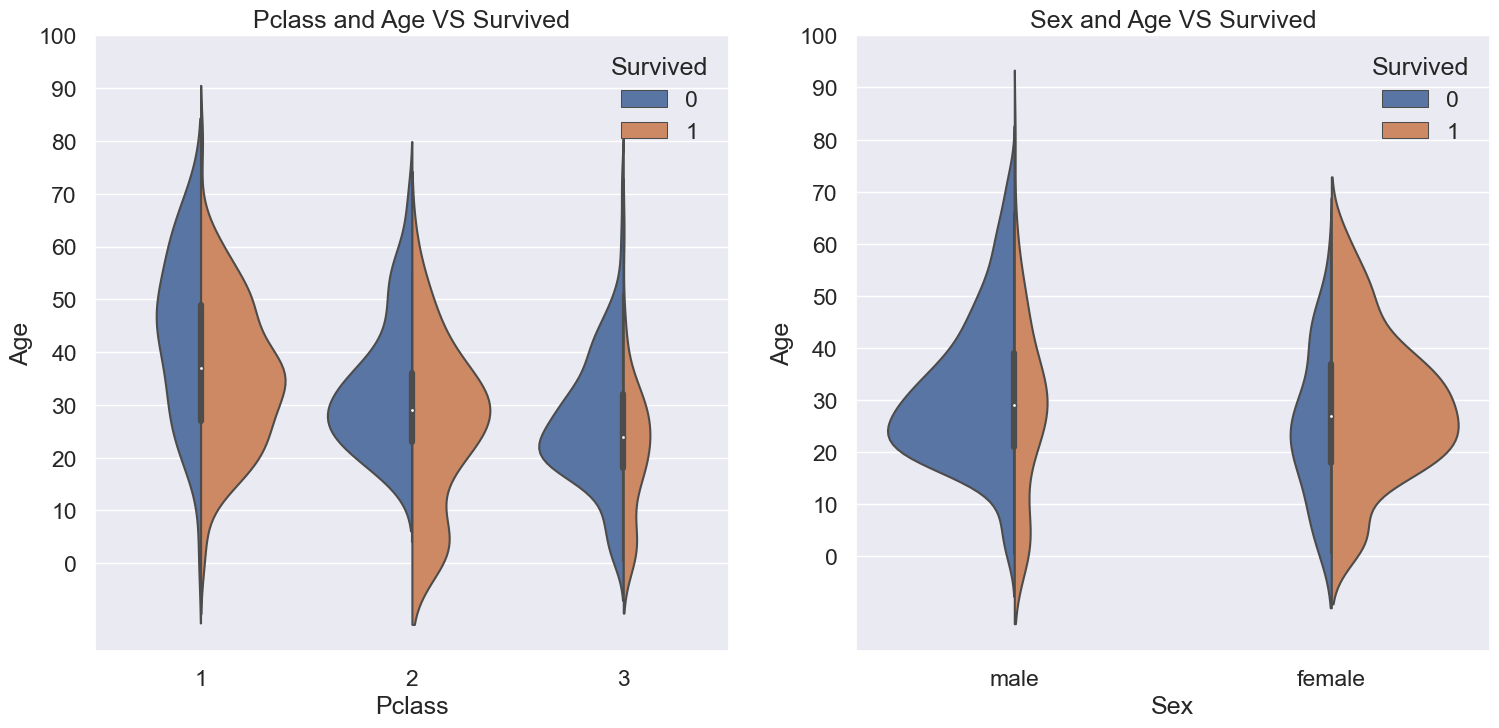

In [107]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data=df_train, x='Sex', y='Age', hue='Survived', scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

# 왼쪽 그림은 Pclass별로 Age의 distribution이 어떻게 다른 지, 거기에 생존 여부에 따라 구분한 그래프이다.
# 오른쪽 그림도 마찬가지로 Sex, 생존 여부에 따른 distribution이 어떻게 다른지 보여주는 그래프이다.

# 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 볼 수 있다.
# 여성과 아이를 먼저 챙긴 것을 볼 수 있다.

#### 6.Embarked
* 탑승한 항구
* 탑승한 곳에 따른 생존률을 확인해 보기

In [109]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


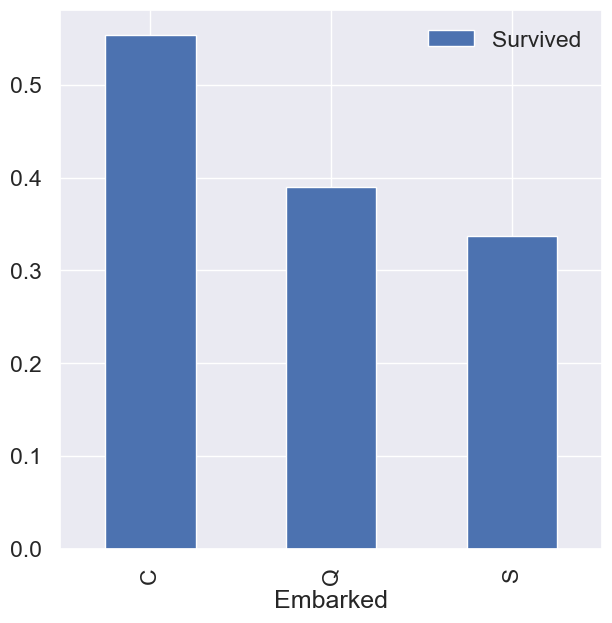

In [111]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)
plt.show()

# 조금의 차이는 있지만 생존률은 비슷한 듯 보임.
# C가 생존률이 가장 높음
# 모델에 큰 영향을 미칠지는 모르지만 사용하도록 함
# 모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있음 > 추후 살펴볼 것임

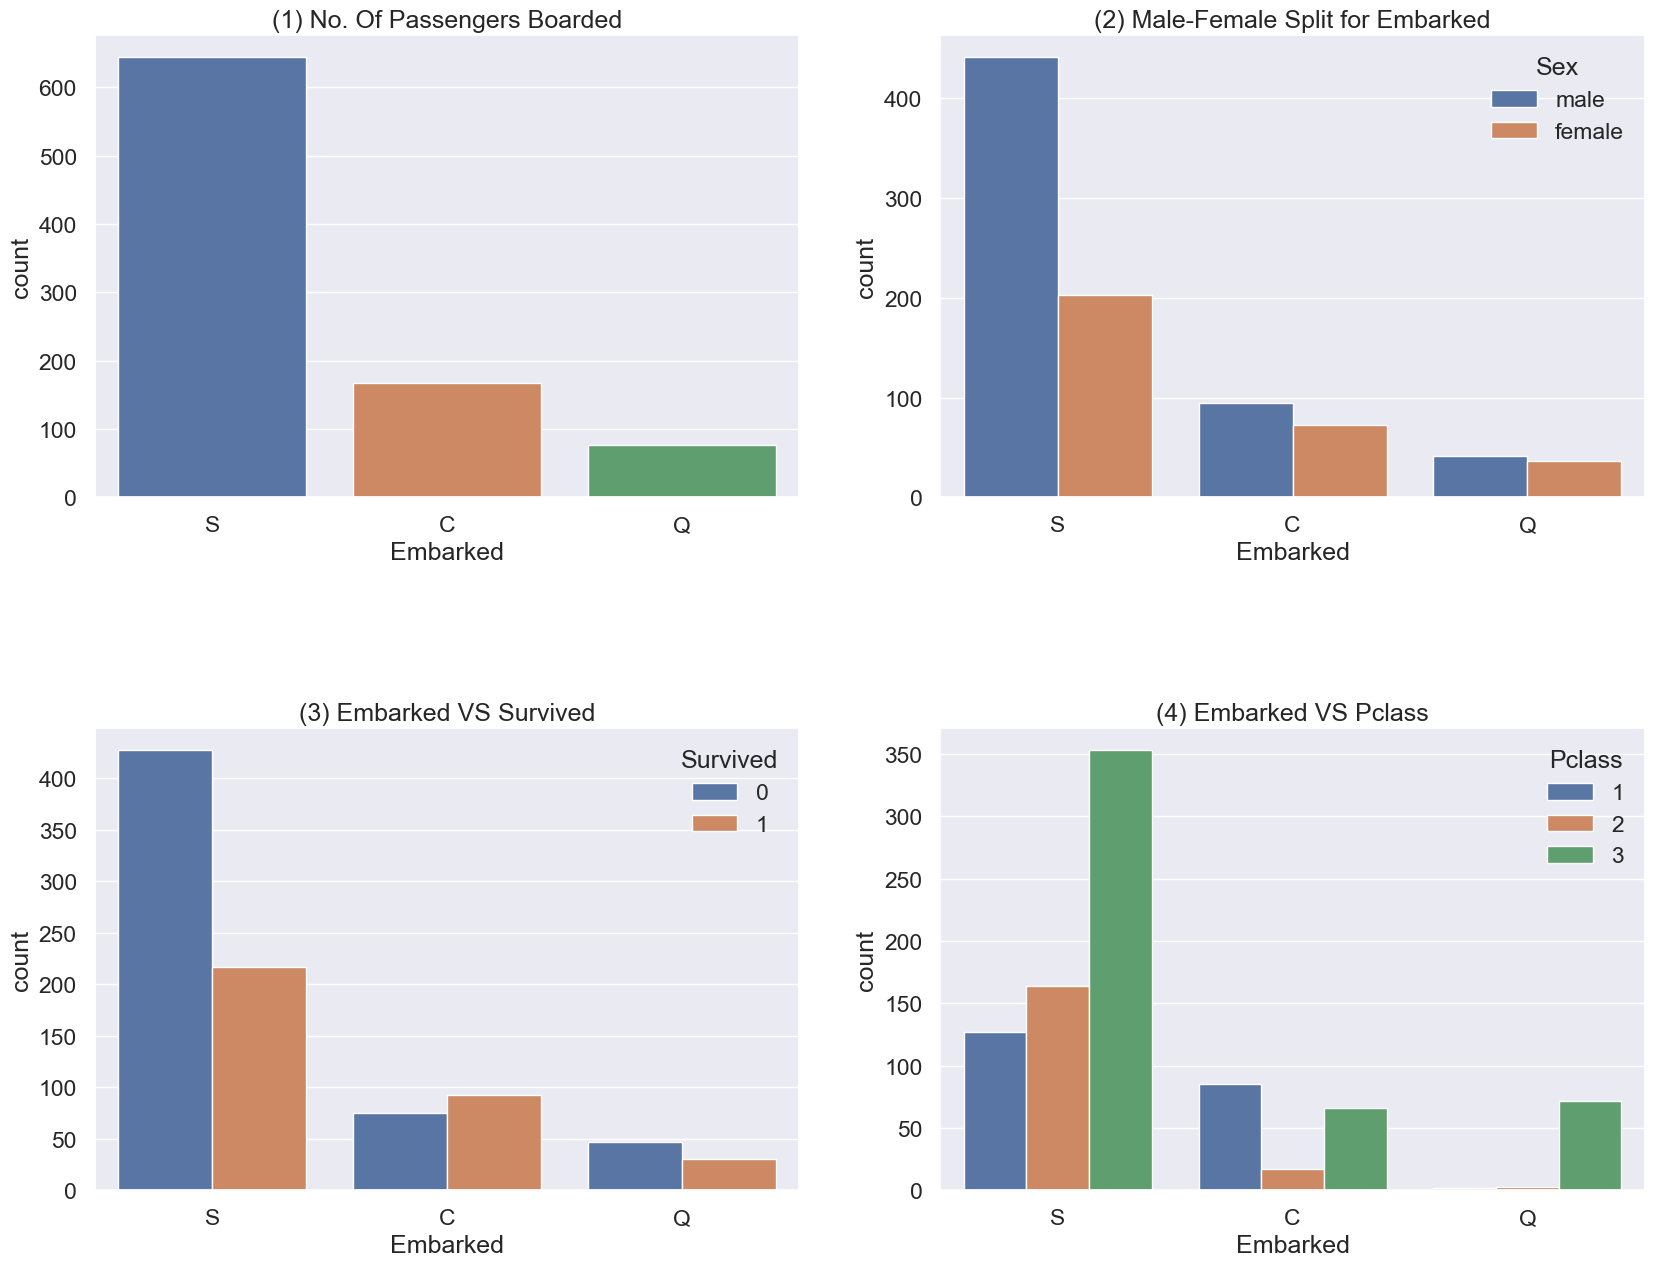

In [113]:
# 다른 feature로 split하려 살펴보기
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(data=df_train, x='Embarked', ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(data=df_train, x='Embarked', hue='Sex', ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked VS Survived')

sns.countplot(data=df_train, x='Embarked', hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked VS Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# fig1 _ 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했다.
# fig2 _ C와 Q는 남녀 비율이 비슷하고, S는 남자가 더 많다
# fig3 _ 생존확률이 S일 경우 많이 낮은 걸 볼 수 있음
# fig4 _ class로 split해서 보니 C가 생존 확률이 높은 건 class가 높은 사람이 많이 타서임.
# S는 3rd 클래스가 많아서 생존확률이 낮게 보임

#### 7.Family - SibSp (형제 자매) + Parch(부모 자녀)
* SibSp와 Parch를 합하면 Family가 될 것이다. Family로 합쳐서 분석해 보았다.

In [114]:
# 자신을 포함해야 하니 1을 더함
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [115]:
print('Maximum size of Family:', df_train['FamilySize'].max())
print('Minimum size of Family:', df_train['FamilySize'].min())

Maximum size of Family: 11
Minimum size of Family: 1


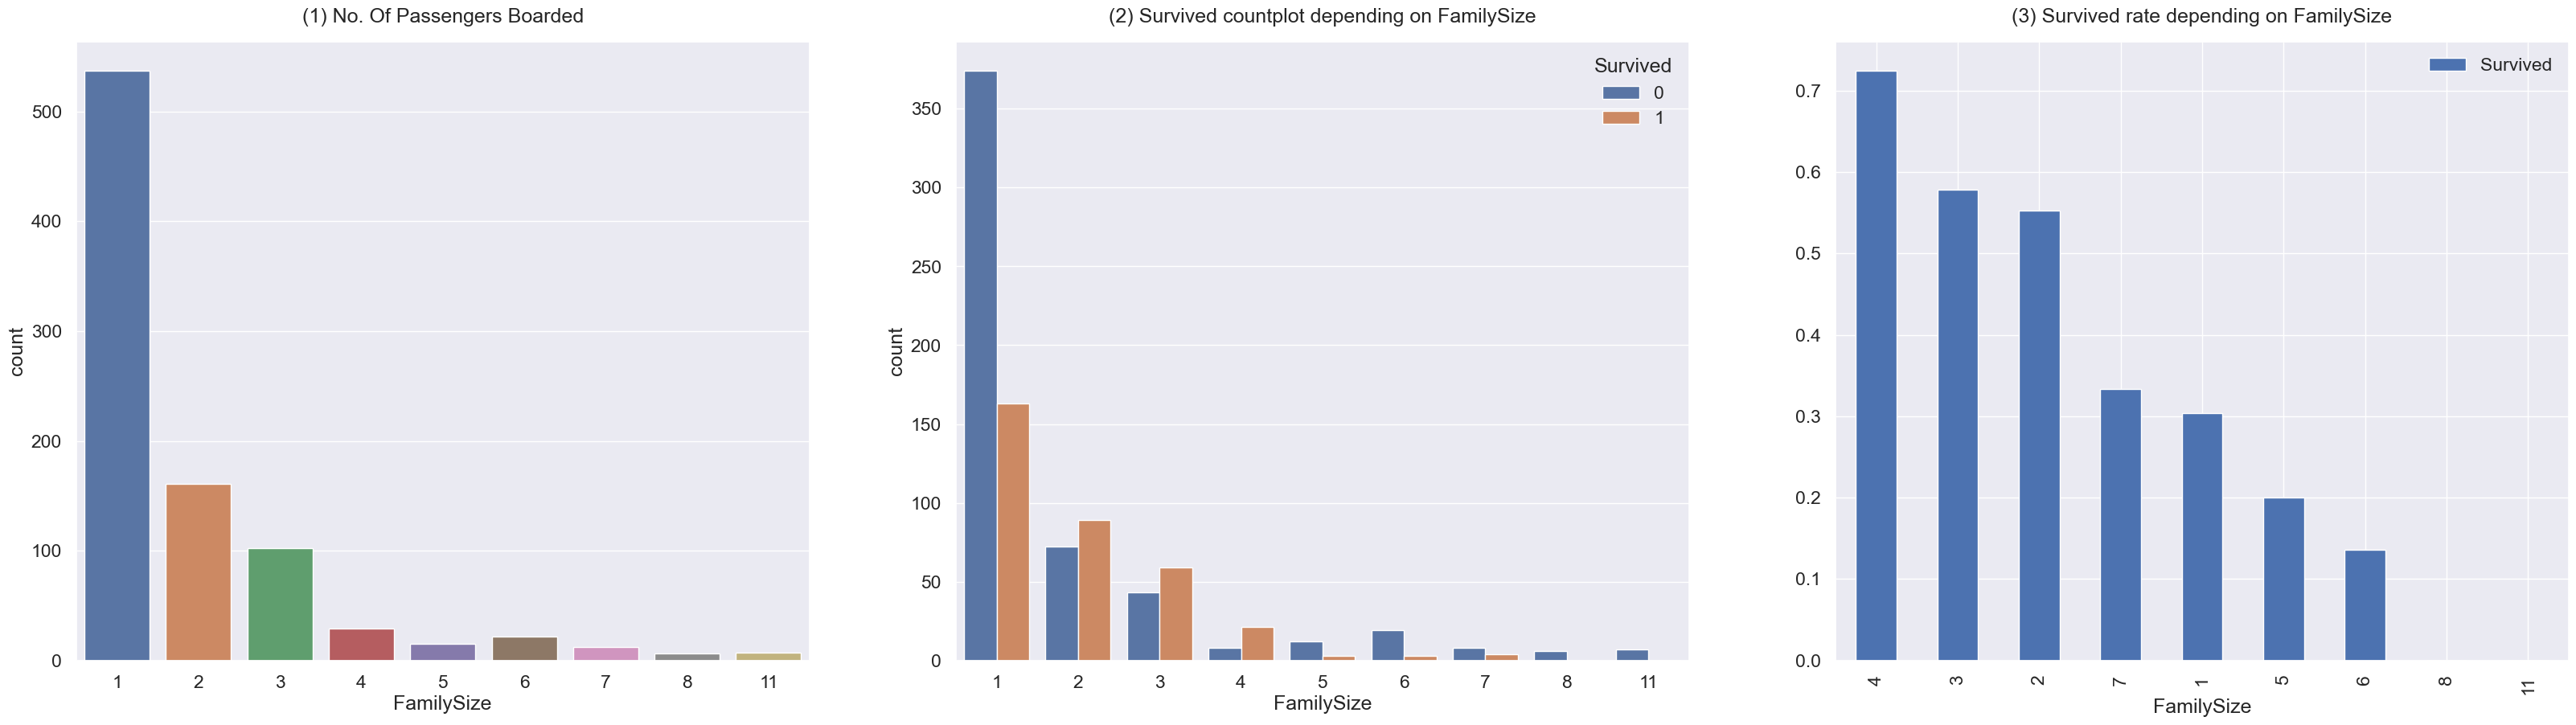

In [116]:
# Family Size와 생존의 관계를 비교해 보았다.
f, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot(data=df_train, x='FamilySize', ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(data=df_train, x='FamilySize', hue='Survived', ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

# fig2 _ 가족 크기가 1~11까지 있음을 볼 수 있다. 대부분 1명이고 그 다음으로 2, 3, 4명이다.
# fig2, 3 _ 가족 크기에 따른 생존 비교이다. 가족이 4명인 경우가 가장 생존 확률이 높다.
# 가족 수가 더 많아질수록 생존확률이 낮았다.
# 3~4명 선에서 생존확류리 높은 것을 확인할 수 있다.

#### 8. Fare
* 탑승요금, contious feature이다.

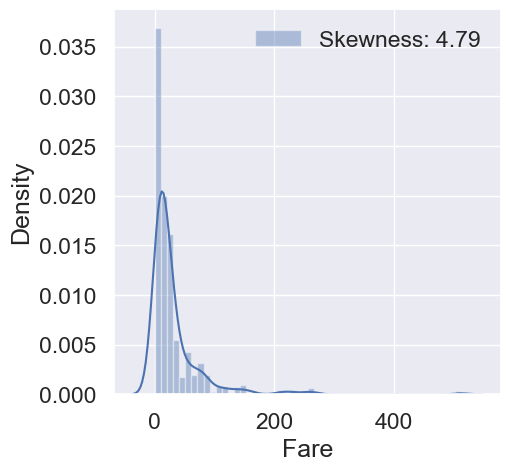

In [117]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* 보이다시피 distribution이 매우 비대칭이다. (high skewness)
* 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있다.
* 몇 개 없는 outlier에 대해 너무 민감하게 반응한다면, 실제 예측 시 좋지 못한 결과를 부를 수도 있다.

* outlier의 영향을 줄이기 위해 Fare에 log를 취할 것임

* 여기서 pandas의 유용한 기능을 사용할 수 있는데, dataframe의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply를 사용하면 매우 손쉽게 적용할 수 있다.

* 우리가 지금 원하는 것은 Fare columns의 데이터 모두를 log값 취하는 것인데, 파이썬의 간단한 lambda함수를 이용해 log를 적용하는 함수를 map인수에 넣어주면, Fare column 데이터에 그대로 적용됨

In [118]:
# testset에 있는 nan value를 평균값으로 치환
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

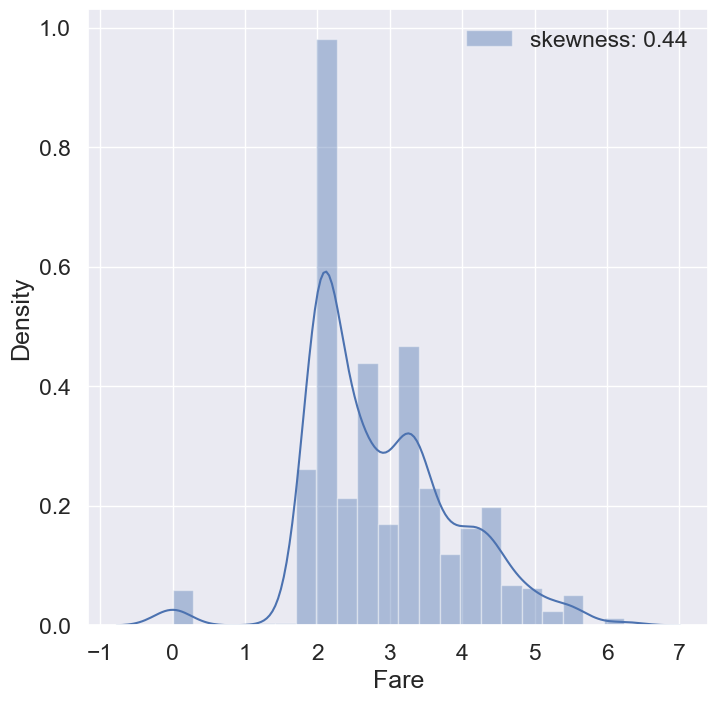

In [119]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* log를 취하니 비대칭성이 많이 사라진 것을 볼 수 있다.
* 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있다.
* 이 작업은 feature engineering인데 미리 작업한 것임
* 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을  feature engineering이라고 함

#### 9.Cabin

* 이 feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기 어려움
* 그러므로 모델에 포함시키지 않도록 함

#### 10.Ticket
* 이 feature에는 NaN은 없음
* string data이므로 추가 작업이 필요함

> 벡터화 시켜야겠지....? 아님 특정 범위로 그룹핑...